In [4]:
from pathlib import Path

import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

from glacierData import glacierData

plt.style.use('default')

In [2]:
gd = glacierData()
gd.calc_response_time()
gd.calc_diseq()
d = gd.rgi

/Users/drotto/src/USGS/glacier-diseq/ak_diseq/thickness.py:10: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  f_geom = pickle.load(f)


LinregressResult(slope=0.20258011784285546, intercept=1.3442230897195826, rvalue=0.3934439384572778, pvalue=5.039933807268878e-207, stderr=0.006322191373555107, intercept_stderr=0.0043767233040188005)
R-squared: 0.154798


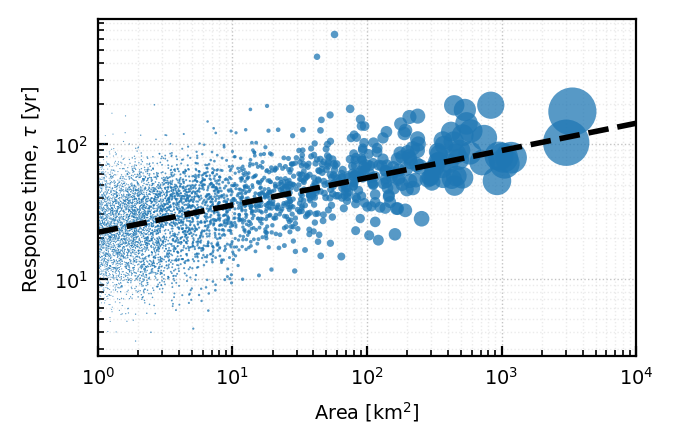

In [22]:
fig, ax = plt.subplots(1,1, figsize=(4.5, 2), dpi=200, layout='constrained')
d = d.loc[d.hf > 0]
d_small = d.loc[(d.Area <= 25) & (d.hf > 0)]
d_big = d.loc[d.Area > 25]
# ax.scatter(d.Area, d['tau'].abs(), lw=0, marker='.', s=np.log10(1 + d.Area/d.Area.max())*4000, c=np.log10(d.Lmax), alpha=0.75, label='Area <= 25 km2')

ax.scatter(d.Area, d['tau'].abs(), lw=0, marker='.', s=np.log10(1+d.Area/d.Area.max())*4000, alpha=0.75, label='Area <= 25 km2')
x = np.arange(0, 5, 0.1)

#ax.set_ylim(None, 1000)
ax.set_yscale('log')
ax.set_xscale('log')

res = sci.stats.linregress(np.log10(d.Area), np.log10(d.tau.abs()))
print(res)
print(f"R-squared: {res.rvalue**2:.6f}")
ax.plot(10**x, 10**(res.intercept + x*res.slope), lw=2, c="black", ls='--', label='Overall fit')


ax.set_xlabel('Area [km$^2$]', fontsize='x-small')
ax.set_ylabel(r'Response time, $\tau$ [yr]', fontsize='x-small')
ax.tick_params(axis='both', which='both', direction='in', length=2, labelsize='x-small')
ax.tick_params(axis='both', which='major', direction='in', length=3.5, labelsize='x-small')
ax.grid(which='major', axis='both', ls=':', lw=0.5, alpha=0.75)
ax.grid(which='minor', axis='both', ls=':', lw=0.5, alpha=0.25)
ax.set_xlim(1, 10000)
ax.set_axisbelow(True)
ax.set_aspect(1)
#ax.legend(fontsize='xx-small')
fig.set_size_inches(3.25, 3.25)

plt.savefig(Path('FigA1.svg'))
plt.savefig(Path('FigA1.png'))